In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = 'Motor_Vehicle_Crashes_modified.csv'

In [4]:
motor_vehicle_df = pd.read_csv(file, encoding="ISO-8859-1")


In [5]:
motor_vehicle_df.head()
#motorvehicle_df.head()

,Year,Vehicle Body Type,Action Prior to Accident,Type / Axles of Truck or Bus,Vehicle Year,State of Registration,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Unnamed: 12
0,2016,SUBURBAN,Changing Lanes,Not Entered,2012.0,NY,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,NaN
1,2016,PICKUP TRUCK,Going Straight Ahead,Not Entered,2014.0,NY,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,NaN
2,2016,4 DOOR SEDAN,Going Straight Ahead,Not Entered,2007.0,NY,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,NaN
3,2016,SUBURBAN,Going Straight Ahead,Not Entered,2011.0,NY,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown,NaN
4,2016,SUBURBAN,Going Straight Ahead,Not Entered,2004.0,NY,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object",NaN


In [6]:
del motor_vehicle_df['Unnamed: 12']
motor_vehicle_df.head()

,Year,Vehicle Body Type,Action Prior to Accident,Type / Axles of Truck or Bus,Vehicle Year,State of Registration,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type
0,2016,SUBURBAN,Changing Lanes,Not Entered,2012.0,NY,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable
1,2016,PICKUP TRUCK,Going Straight Ahead,Not Entered,2014.0,NY,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable
2,2016,4 DOOR SEDAN,Going Straight Ahead,Not Entered,2007.0,NY,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable
3,2016,SUBURBAN,Going Straight Ahead,Not Entered,2011.0,NY,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown
4,2016,SUBURBAN,Going Straight Ahead,Not Entered,2004.0,NY,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object"


In [7]:
motor_vehicle_df.count()
#motorvehicle_df.count()
#motor_vehicle_df['Vehicle Make'].value_counts()

Year                                 1048575
Vehicle Body Type                    1048575
Action Prior to Accident             1048575
Type / Axles of Truck or Bus         1048575
Vehicle Year                          890678
State of Registration                 965273
Vehicle Make                          891552
Contributing Factor 1                1048552
Contributing Factor 1 Description    1048552
Contributing Factor 2                1048553
Contributing Factor 2 Description    1048553
Event Type                           1028946
dtype: int64

In [8]:
motor_vehicle_df = motor_vehicle_df.dropna(how='any')

In [9]:
motor_vehicle_df.count()

Year                                 870343
Vehicle Body Type                    870343
Action Prior to Accident             870343
Type / Axles of Truck or Bus         870343
Vehicle Year                         870343
State of Registration                870343
Vehicle Make                         870343
Contributing Factor 1                870343
Contributing Factor 1 Description    870343
Contributing Factor 2                870343
Contributing Factor 2 Description    870343
Event Type                           870343
dtype: int64

In [10]:
#motor_vehicle_df['Vehicle Make'].replace('TYOYTA', 'TOYOTA', inplace = True)
motor_vehicle_df['Vehicle Make'] = motor_vehicle_df['Vehicle Make'].replace({'FRD':'FORD','NISSA': 'NISSAN','HYUND' :'HYUNDAI','SUBAR':'SUBARU'})



In [11]:
motor_vehicle_df['Vehicle Make'].value_counts()

TOYOT      101443
FORD        96623
HONDA       89126
CHEVR       86578
NISSAN      65892
DODGE       37912
HYUNDAI     35850
JEEP        34433
SUBARU      21591
CHRYS       17852
VOLKS       16665
KIA         16602
BMW         16503
GMC         16192
ME/BE       14619
LEXUS       12129
ACURA       11831
MAZDA       11322
BUICK       11166
PONTI       10721
LINCO        8541
MITSU        7758
AUDI         7533
INFIN        7510
CADIL        7230
SATUR        7083
MERCU        7044
VOLVO        5608
CHEV         5323
TOYT         5140
            ...  
SMLX            1
ETNY            1
EMER            1
NEWN            1
WO/CU           1
YAAH            1
LDV             1
OLDMS           1
TANK            1
VICOT           1
A/CHA           1
FEEIG           1
FRIG            1
BENSE           1
DIVCO           1
FISKE           1
TRWO            1
MVONE           1
CLUB            1
NAMC            1
WESD            1
K W             1
TRKIN           1
FREUG           1
NOMAD     

In [12]:
bodytype_year1_df = motor_vehicle_df.loc[:,["Year","Vehicle Body Type"]]
bodytype_year_df = bodytype_year1_df.rename(columns={"Vehicle Body Type":"Veh_Bodytype"})
bodytype_year_df.head()

,Year,Veh_Bodytype
0,2016,SUBURBAN
1,2016,PICKUP TRUCK
2,2016,4 DOOR SEDAN
3,2016,SUBURBAN
4,2016,SUBURBAN


In [13]:
bodytype_year_df.shape

(870343, 2)

In [14]:
grouped_factor_df = bodytype_year_df.groupby(["Veh_Bodytype"])
bodytype_count = grouped_factor_df["Year"].count()
bodytype_df = pd.DataFrame({"Count" : bodytype_count})

bodytype_df = bodytype_df.reset_index()
bodytype_df = bodytype_df.sort_values(['Count'], ascending=False)

print(bodytype_df)




                 Veh_Bodytype   Count
1                4 DOOR SEDAN  392758
47                   SUBURBAN  303765
34               PICKUP TRUCK   61568
0                2 DOOR SEDAN   41749
60                  VAN TRUCK   15911
28                 MOTORCYCLE    8260
52                    TRACTOR    7882
8                 CONVERTIBLE    6805
5               BUS (OMNIBUS)    6559
13                       DUMP    5647
49                       TAXI    5283
10             DELIVERY TRUCK    2879
59                    UTILITY    2216
35             POLICE VEHICLE    1151
18             FLAT BED TRUCK     901
50                  TOW TRUCK     810
48                 TANK TRUCK     626
42                      SEDAN     615
37         REFRIGERATOR TRUCK     588
57              UNKNOWN TRUCK     580
46                STAKE TRUCK     425
58            UNKNOWN VEHICLE     343
3                   AMBULANCE     323
21            HOUSE ON WHEELS     249
51            TRACTION ENGINE     234
32          

In [15]:
bodytype1_df = bodytype_df[bodytype_df['Veh_Bodytype'].str.contains("SEDAN") | bodytype_df['Veh_Bodytype'].str.contains("CONVERTIBLE") 
           |  bodytype_df['Veh_Bodytype'].str.contains("TAXI") |  bodytype_df['Veh_Bodytype'].str.contains("MOTORCY")
            |  bodytype_df['Veh_Bodytype'].str.contains("MOPED")|  bodytype_df['Veh_Bodytype'].str.contains("SUB")
          
           | bodytype_df['Veh_Bodytype'].str.contains("BUS")| bodytype_df['Veh_Bodytype'].str.contains("POLICE")]
bodytype1_df


,Veh_Bodytype,Count
1,4 DOOR SEDAN,392758
47,SUBURBAN,303765
0,2 DOOR SEDAN,41749
28,MOTORCYCLE,8260
8,CONVERTIBLE,6805
5,BUS (OMNIBUS),6559
49,TAXI,5283
35,POLICE VEHICLE,1151
42,SEDAN,615
27,MOPED,115


<IPython.core.display.Javascript object>


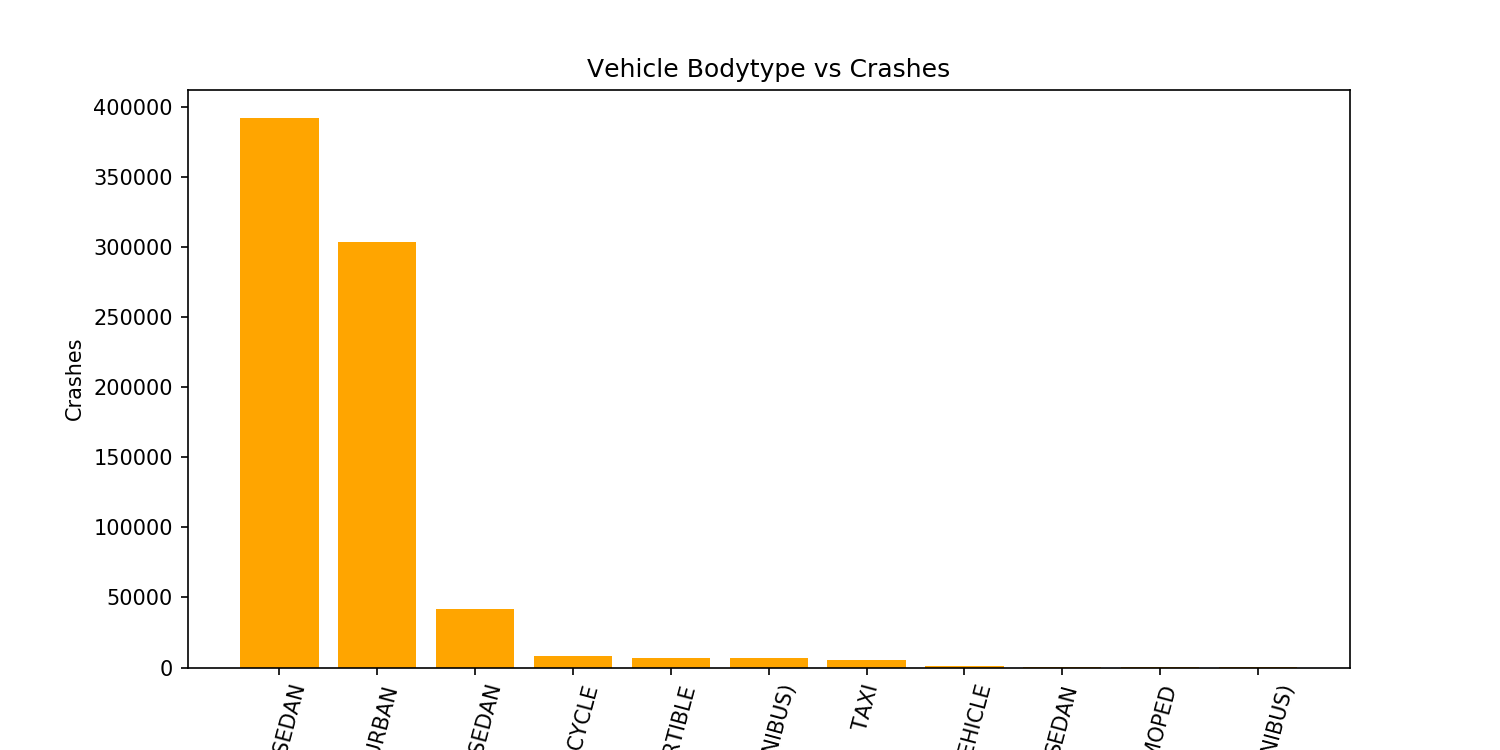

In [16]:
plt.figure(figsize=(10,5))
xaxis = np.arange(len(bodytype1_df))
tick_locations = [value+0.4 for value in xaxis]


yaxis = bodytype1_df["Count"]
plt.bar(xaxis,yaxis, color="orange", align="edge")

plt.xticks(tick_locations, bodytype1_df["Veh_Bodytype"], rotation="75")
plt.title("Vehicle Bodytype vs Crashes")
plt.xlabel("Veh_Bodytype")
plt.ylabel("Crashes")
plt.show()

In [17]:
plt.savefig("C:/Users/hello/OneDrive/Desktop/Rutgers-project1/Images/Vehicle_bodytype.png")
plt.show()

In [18]:
bodytype2_df = bodytype_df[bodytype_df['Veh_Bodytype'].str.contains("TRUCK") | bodytype_df['Veh_Bodytype'].str.contains("TRACTOR") 
           |  bodytype_df['Veh_Bodytype'].str.contains("DUMP") |  bodytype_df['Veh_Bodytype'].str.contains("UTILTY")]
            
bodytype2_df

,Veh_Bodytype,Count
34,PICKUP TRUCK,61568
60,VAN TRUCK,15911
52,TRACTOR,7882
13,DUMP,5647
10,DELIVERY TRUCK,2879
18,FLAT BED TRUCK,901
50,TOW TRUCK,810
48,TANK TRUCK,626
37,REFRIGERATOR TRUCK,588
57,UNKNOWN TRUCK,580


<IPython.core.display.Javascript object>


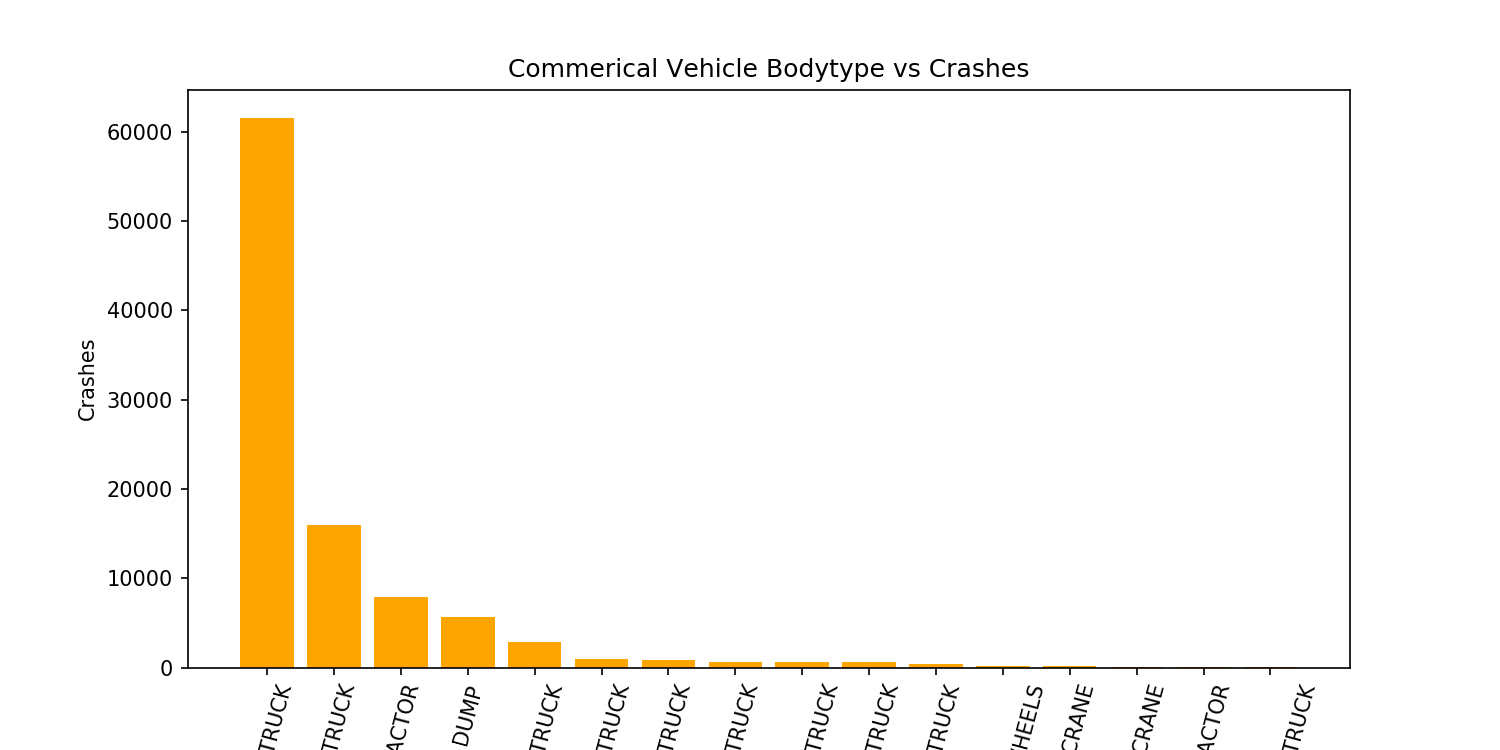

In [19]:
plt.figure(figsize=(10,5))
xaxis = np.arange(len(bodytype2_df))
tick_locations = [value+0.4 for value in xaxis]


yaxis = bodytype2_df["Count"]
plt.bar(xaxis,yaxis, color="orange", align="edge")

plt.xticks(tick_locations, bodytype2_df["Veh_Bodytype"], rotation="75")
plt.title("Commerical Vehicle Bodytype vs Crashes")
plt.xlabel("Veh_Bodytype")
plt.ylabel("Crashes")
plt.show()

In [20]:
plt.savefig("C:/Users/hello/OneDrive/Desktop/Rutgers-project1/Images/commerical_bodytype.png")
plt.show()